In [75]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd

In [77]:
import datetime as dt
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct, desc

In [41]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#prcp = engine.execute("SELECT * FROM measurement").
last_date = session.query(func.max(Measurement.date)).all()
last_date = last_date[0][0]
year = timedelta(days=365)
end = datetime.strptime(last_date, "%Y-%m-%d")

# Calculate the date 1 year ago from the last data point in the database
begin = end - year


In [47]:
# Perform a query to retrieve the data and precipitation scores
pr_meas = session.query(Measurement).filter(Measurement.date >= begin, Measurement.date <= end).all()
pm_df = []
for i in pr_meas:
    pm_df.append((i.id,i.station,i.date,i.prcp,i.tobs))
pm_df

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pm_df2 = pd.DataFrame(pm_df, columns =["Station activity", "Station", "Date", "Precipitation", "Temperature"])
pm_df2.head()

,Station activity,Station,Date,Precipitation,Temperature
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


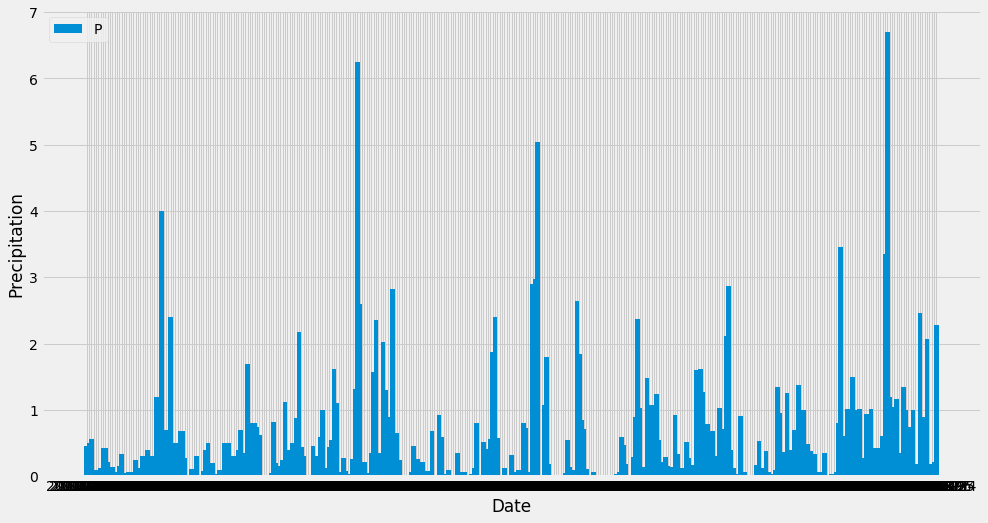

In [52]:
# Sort the dataframe by date
pm_df2 = pm_df2.sort_values("Date", ascending=False)
pm_df2.head()
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(pm_df2["Date"], pm_df2["Precipitation"], width=2, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.rcParams["figure.figsize"] = (15, 8)
plt.legend("Precipitation")
plt.grid

# save fig
plt.savefig("Images/Precipitation.png")
# display plot
plt.show()


In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pm_stats = pm_df2["Precipitation"]
pm_stats = pd.DataFrame(pm_stats)
pm_stats.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [81]:
# Design a query to show how many stations are available in this dataset?
station_avail = session.query(func.distinct(Measurement.station)).all()
len(station_avail)


9

In [134]:
most_active = session.query(Measurement.station, func.count(Measurement.station).label("count")).\
group_by(Measurement.station).order_by(desc(Measurement.station)).all()

#list the stations and counts in descending order
most_active = pd.DataFrame(most_active)
most_active = most_active.sort_values(by="count", ascending=False)
most_active

,station,count
2,USC00519281,2772
1,USC00519397,2724
7,USC00513117,2709
0,USC00519523,2669
5,USC00516128,2612
6,USC00514830,2202
8,USC00511918,1979
4,USC00517948,1372
3,USC00518838,511


In [137]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                            func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
temps

[(54.0, 85.0, 71.66378066378067)]

In [139]:
# Choose the station with the highest number of temperature observations.
highest_no = session.query(Measurement.station, func.count(Measurement.station).label("count")).\
group_by(Measurement.station).order_by(desc("count")).first()
highest_no

('USC00519281', 2772)

In [147]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= begin, Measurement.date <= end).\
filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()
temp_data = []
for temp in temp_obs:
    temp_data.append(temp)

In [149]:
temp_df = pd.DataFrame(temp_data)
temp_df.head()

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
5,2016-08-29,78.0
6,2016-08-30,77.0
7,2016-08-31,78.0
8,2016-09-01,80.0
9,2016-09-02,80.0


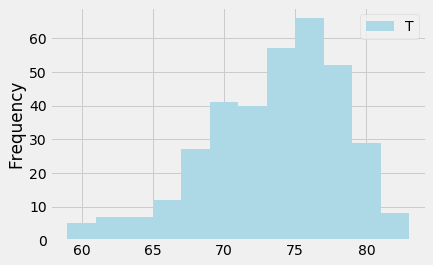

In [152]:
bins = 12
n, bins, patches = plt.hist(temp_df["tobs"], bins, facecolor = "lightblue")
plt.ylabel("Frequency")
plt.legend("Temp")
# save fig
plt.savefig("Images/Histogram.png")
# display plot
plt.show()